# Machine learning analysis
this takes the data set after feature engineering and cleaning and runs ridge and neural network regression. This has only the final models which will be used without any of the exploratory analysis. For more information on the exploratory analysis which was done refer to the paper.

In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats.stats import pearsonr
import time

In [3]:
df_act = {}
df_act_test = {}
for i in range(1, 16):
    df_act[str(i)] = (pd.read_csv('feature_updates/train_act'+str(i)+'.csv', index_col=0))
#     df_act_test[str(i)] = (pd.read_csv('feature_updates/test_act'+str(i)+'.csv', index_col=0))
    print(i)
# df_act = {}
# for i in range(1, 16):
#     df_act[str(i)] = (pd.read_csv('act'+str(i)+'.csv'))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


# Machine learning prediction and analysis

In [4]:
# Importing proper libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [5]:
import tensorflow as tf
from tensorflow import set_random_seed

import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import initializers
from keras.models import Sequential
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Machine learning NN & Ridge Regression on all datasets

In [19]:
# dictionary initialization to hold the R-squared values and predicted values
r2_nn = {}
r2_ridge = {}
y_testd = {}
y_predict_ridged = {}
y_predict_nnd = {}
t1 = time.time()
for i in range(1,16):   # loop over entire dataset
    #### Defining features and y variables ####
    y = df_act[str(i)].Act.values
    X = df_act[str(i)].drop(['MOLECULE', 'Act'], axis=1).values

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2) #train test split 80/20
    
    y_testd[str(i)] = y_test
    
    #### Ridge regression analysis ####
    scaler = StandardScaler()
    ridge = Ridge(alpha=1000)
    ridge_scaled = Pipeline(steps=[('scaler',scaler), ('ridge',ridge)])

    ridge_scaled.fit(X_train, y_train)
    y_predict_ridge = ridge_scaled.predict(X_test)
    y_predict_ridged[str(i)] = y_predict_ridge
    
    print('Ridge R^2 value is: ' + str(r2_score(y_testd[str(i)], y_predict_ridge)))
    
    r2_ridge[str(i)] = r2_score(y_testd[str(i)], y_predict_ridge)
    
    #### Neural network analysis ####
    ## Change in NN analysis for Act 10 to increase accuracy (different number of epochs and layers)
    if (i == 10):
        
        # # Save the number of columns in predictors: n_cols
        n_cols = X_train.shape[1]

        # # Set up the model: model
        model = Sequential()
        # # Add the first layer
        model.add(Dense(500, activation='relu', input_shape=(n_cols,)))
        model.add(BatchNormalization())
        # # Add the second layer
        model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
        model.add(BatchNormalization())

        model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
        model.add(BatchNormalization())

        # # Add the output layer
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        # # Verify that model contains information from compiling
        print("Loss function: " + model.loss)


        # model_fit = model.fit(X_train, y_train, epochs=70, validation_split=0.2, callbacks=[early_stopping_monitor])
        model.fit(X_train, y_train, epochs=15)
    else:
        # # Save the number of columns in predictors: n_cols
        n_cols = X_train.shape[1]

        # # Set up the model: model
        model = Sequential()

        # # Add the first layer
        model.add(Dense(100, activation='relu', input_shape=(n_cols,), bias_initializer=initializers.Constant(0.1)))

        # # Add the second layer
        model.add(Dense(50, activation='relu', input_shape=(n_cols,), bias_initializer=initializers.Constant(0.1)))


        # # Add the output layer
        model.add(Dense(1))


        model.compile(optimizer='adam', loss='mean_squared_error')
        # # Verify that model contains information from compiling
        print("Loss function: " + model.loss)

        model.fit(X_train, y_train, epochs=8)

    y_predict_nn = model.predict(X_test)
    y_predict_nnd[str(i)] = y_predict_nn

    print('R^2 value is: ' + str(r2_score(y_testd[str(i)], y_predict_nn)))
    
    r2_nn[str(i)] = r2_score(y_testd[str(i)], y_predict_nn)
t2 = time.time()  # printing the time for analysis
print(t2 - t1)

C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.5655663009993637
Loss function: mean_squared_error
Epoch 1/8
29792/29792 [==============================] - 8s 265us/step - loss: 0.3725
Epoch 2/8
29792/29792 [==============================] - 7s 220us/step - loss: 0.2053
Epoch 3/8
29792/29792 [==============================] - 7s 220us/step - loss: 0.1839
Epoch 4/8
29792/29792 [==============================] - 7s 220us/step - loss: 0.1744
Epoch 5/8
29792/29792 [==============================] - 7s 231us/step - loss: 0.1584
Epoch 6/8
29792/29792 [==============================] - 7s 235us/step - loss: 0.1515
Epoch 7/8
29792/29792 [==============================] - 7s 234us/step - loss: 0.1421
Epoch 8/8
29792/29792 [==============================] - 7s 235us/step - loss: 0.1333
R^2 value is: 0.6201415383799003


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.6032829690533751
Loss function: mean_squared_error
Epoch 1/8
6972/6972 [==============================] - 2s 356us/step - loss: 0.9940
Epoch 2/8
6972/6972 [==============================] - 1s 159us/step - loss: 0.6184
Epoch 3/8
6972/6972 [==============================] - 1s 161us/step - loss: 0.5180
Epoch 4/8
6972/6972 [==============================] - 1s 167us/step - loss: 0.4740
Epoch 5/8
6972/6972 [==============================] - 1s 163us/step - loss: 0.4574
Epoch 6/8
6972/6972 [==============================] - 1s 160us/step - loss: 0.4157
Epoch 7/8
6972/6972 [==============================] - 1s 160us/step - loss: 0.4032
Epoch 8/8
6972/6972 [==============================] - 1s 162us/step - loss: 0.3756
R^2 value is: 0.6449569640001309


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.6127708994235506
Loss function: mean_squared_error
Epoch 1/8
4918/4918 [==============================] - 2s 426us/step - loss: 1.8004
Epoch 2/8
4918/4918 [==============================] - 1s 149us/step - loss: 0.6251
Epoch 3/8
4918/4918 [==============================] - 1s 148us/step - loss: 0.5798
Epoch 4/8
4918/4918 [==============================] - 1s 149us/step - loss: 0.4760
Epoch 5/8
4918/4918 [==============================] - 1s 154us/step - loss: 0.4264
Epoch 6/8
4918/4918 [==============================] - 1s 155us/step - loss: 0.4265
Epoch 7/8
4918/4918 [==============================] - 1s 154us/step - loss: 0.3993
Epoch 8/8
4918/4918 [==============================] - 1s 154us/step - loss: 0.3813
R^2 value is: 0.6156946971293749


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.6159969253549232
Loss function: mean_squared_error
Epoch 1/8
1452/1452 [==============================] - 2s 1ms/step - loss: 3.6329
Epoch 2/8
1452/1452 [==============================] - 0s 159us/step - loss: 0.3874
Epoch 3/8
1452/1452 [==============================] - 0s 150us/step - loss: 0.2409
Epoch 4/8
1452/1452 [==============================] - 0s 150us/step - loss: 0.1734
Epoch 5/8
1452/1452 [==============================] - 0s 159us/step - loss: 0.1446
Epoch 6/8
1452/1452 [==============================] - 0s 154us/step - loss: 0.1293
Epoch 7/8
1452/1452 [==============================] - 0s 155us/step - loss: 0.1191
Epoch 8/8
1452/1452 [==============================] - 0s 159us/step - loss: 0.1233
R^2 value is: 0.4008253313646859


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.6846367997802745
Loss function: mean_squared_error
Epoch 1/8
2569/2569 [==============================] - 2s 715us/step - loss: 4.6139
Epoch 2/8
2569/2569 [==============================] - 0s 173us/step - loss: 1.2035
Epoch 3/8
2569/2569 [==============================] - 0s 179us/step - loss: 1.1126
Epoch 4/8
2569/2569 [==============================] - 0s 175us/step - loss: 0.9261
Epoch 5/8
2569/2569 [==============================] - 0s 181us/step - loss: 1.1004
Epoch 6/8
2569/2569 [==============================] - 0s 182us/step - loss: 0.7560
Epoch 7/8
2569/2569 [==============================] - 0s 182us/step - loss: 0.6720
Epoch 8/8
2569/2569 [==============================] - 0s 181us/step - loss: 0.6401
R^2 value is: 0.6315788453868827


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.800670898511675
Loss function: mean_squared_error
Epoch 1/8
29910/29910 [==============================] - 9s 315us/step - loss: 0.4554
Epoch 2/8
29910/29910 [==============================] - 8s 273us/step - loss: 0.2665
Epoch 3/8
29910/29910 [==============================] - 8s 278us/step - loss: 0.2281
Epoch 4/8
29910/29910 [==============================] - 8s 278us/step - loss: 0.2030
Epoch 5/8
29910/29910 [==============================] - 8s 277us/step - loss: 0.1865
Epoch 6/8
29910/29910 [==============================] - 8s 283us/step - loss: 0.1720
Epoch 7/8
29910/29910 [==============================] - 8s 281us/step - loss: 0.1575
Epoch 8/8
29910/29910 [==============================] - 8s 281us/step - loss: 0.1470
R^2 value is: 0.8327194078075719


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.6119863283928704
Loss function: mean_squared_error
Epoch 1/8
1255/1255 [==============================] - 2s 1ms/step - loss: 1717.3087
Epoch 2/8
1255/1255 [==============================] - 0s 148us/step - loss: 844.3112
Epoch 3/8
1255/1255 [==============================] - 0s 146us/step - loss: 658.6655
Epoch 4/8
1255/1255 [==============================] - 0s 150us/step - loss: 557.9876
Epoch 5/8
1255/1255 [==============================] - 0s 149us/step - loss: 491.1650
Epoch 6/8
1255/1255 [==============================] - 0s 146us/step - loss: 426.3494
Epoch 7/8
1255/1255 [==============================] - 0s 175us/step - loss: 381.1767
Epoch 8/8
1255/1255 [==============================] - 0s 189us/step - loss: 356.5236
R^2 value is: 0.58150637104491


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.644777879040849
Loss function: mean_squared_error
Epoch 1/8
7972/7972 [==============================] - 3s 359us/step - loss: 2.0008
Epoch 2/8
7972/7972 [==============================] - 1s 180us/step - loss: 0.6179
Epoch 3/8
7972/7972 [==============================] - 1s 182us/step - loss: 0.5392
Epoch 4/8
7972/7972 [==============================] - 2s 213us/step - loss: 0.4738
Epoch 5/8
7972/7972 [==============================] - 2s 218us/step - loss: 0.4491
Epoch 6/8
7972/7972 [==============================] - 2s 220us/step - loss: 0.4460
Epoch 7/8
7972/7972 [==============================] - 2s 200us/step - loss: 0.4330
Epoch 8/8
7972/7972 [==============================] - 2s 217us/step - loss: 0.4165
R^2 value is: 0.6142211566594338


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.7234903443448208
Loss function: mean_squared_error
Epoch 1/8
4280/4280 [==============================] - 2s 529us/step - loss: 1.1292
Epoch 2/8
4280/4280 [==============================] - 1s 168us/step - loss: 0.5131
Epoch 3/8
4280/4280 [==============================] - 1s 174us/step - loss: 0.4348
Epoch 4/8
4280/4280 [==============================] - 1s 188us/step - loss: 0.3752
Epoch 5/8
4280/4280 [==============================] - 1s 170us/step - loss: 0.3535
Epoch 6/8
4280/4280 [==============================] - 1s 162us/step - loss: 0.3060
Epoch 7/8
4280/4280 [==============================] - 1s 167us/step - loss: 0.2977
Epoch 8/8
4280/4280 [==============================] - 1s 174us/step - loss: 0.2895
R^2 value is: 0.6921121575115006


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.6432059055048905
Loss function: mean_squared_error
Epoch 1/15
8920/8920 [==============================] - 9s 1ms/step - loss: 41.5416
Epoch 2/15
8920/8920 [==============================] - 7s 752us/step - loss: 11.4592
Epoch 3/15
8920/8920 [==============================] - 7s 757us/step - loss: 1.1485
Epoch 4/15
8920/8920 [==============================] - 7s 754us/step - loss: 0.6070
Epoch 5/15
8920/8920 [==============================] - 7s 767us/step - loss: 0.5705
Epoch 6/15
8920/8920 [==============================] - 7s 774us/step - loss: 0.5219
Epoch 7/15
8920/8920 [==============================] - 7s 796us/step - loss: 0.5112
Epoch 8/15
8920/8920 [==============================] - 7s 776us/step - loss: 0.4975
Epoch 9/15
8920/8920 [==============================] - 7s 790us/step - loss: 0.4869
Epoch 10/15
8920/8920 [==============================] - 7s 778us/step - loss: 0.4619
Epoch 11/15
8920/8920 [==============================] - 7s 793us/step - los

C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.6193379550281239
Loss function: mean_squared_error
Epoch 1/8
5119/5119 [==============================] - 3s 518us/step - loss: 0.3598
Epoch 2/8
5119/5119 [==============================] - 1s 178us/step - loss: 0.1215
Epoch 3/8
5119/5119 [==============================] - 1s 175us/step - loss: 0.1032
Epoch 4/8
5119/5119 [==============================] - 1s 176us/step - loss: 0.0841
Epoch 5/8
5119/5119 [==============================] - 1s 175us/step - loss: 0.0823
Epoch 6/8
5119/5119 [==============================] - 1s 175us/step - loss: 0.0754
Epoch 7/8
5119/5119 [==============================] - 1s 175us/step - loss: 0.0636
Epoch 8/8
5119/5119 [==============================] - 1s 183us/step - loss: 0.0635
R^2 value is: 0.5474202739706024


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.6290016992165663
Loss function: mean_squared_error
Epoch 1/8
6920/6920 [==============================] - 3s 413us/step - loss: 0.4301
Epoch 2/8
6920/6920 [==============================] - 1s 186us/step - loss: 0.1908
Epoch 3/8
6920/6920 [==============================] - 1s 190us/step - loss: 0.1607
Epoch 4/8
6920/6920 [==============================] - 1s 186us/step - loss: 0.1395
Epoch 5/8
6920/6920 [==============================] - 1s 188us/step - loss: 0.1263
Epoch 6/8
6920/6920 [==============================] - 1s 187us/step - loss: 0.1131
Epoch 7/8
6920/6920 [==============================] - 1s 187us/step - loss: 0.1058
Epoch 8/8
6920/6920 [==============================] - 1s 189us/step - loss: 0.0984
R^2 value is: 0.6802451364624374


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.4148918793403006
Loss function: mean_squared_error
Epoch 1/8
4884/4884 [==============================] - 3s 529us/step - loss: 0.5536
Epoch 2/8
4884/4884 [==============================] - 1s 201us/step - loss: 0.2099
Epoch 3/8
4884/4884 [==============================] - 1s 200us/step - loss: 0.1794
Epoch 4/8
4884/4884 [==============================] - 1s 201us/step - loss: 0.1615
Epoch 5/8
4884/4884 [==============================] - 1s 198us/step - loss: 0.1418
Epoch 6/8
4884/4884 [==============================] - 1s 198us/step - loss: 0.1402
Epoch 7/8
4884/4884 [==============================] - 1s 200us/step - loss: 0.1205
Epoch 8/8
4884/4884 [==============================] - 1s 201us/step - loss: 0.1107
R^2 value is: 0.3924222698743445


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.3812552197928307
Loss function: mean_squared_error
Epoch 1/8
3332/3332 [==============================] - 2s 692us/step - loss: 0.3754
Epoch 2/8
3332/3332 [==============================] - 1s 185us/step - loss: 0.1416
Epoch 3/8
3332/3332 [==============================] - 1s 190us/step - loss: 0.1238
Epoch 4/8
3332/3332 [==============================] - 1s 190us/step - loss: 0.1099
Epoch 5/8
3332/3332 [==============================] - 1s 190us/step - loss: 0.0990
Epoch 6/8
3332/3332 [==============================] - 1s 192us/step - loss: 0.0881
Epoch 7/8
3332/3332 [==============================] - 1s 190us/step - loss: 0.0765
Epoch 8/8
3332/3332 [==============================] - 1s 191us/step - loss: 0.0722
R^2 value is: 0.3956701296956008


C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A1995\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ridge R^2 value is: 0.8050309845348779
Loss function: mean_squared_error
Epoch 1/8
4047/4047 [==============================] - 3s 620us/step - loss: 2.2264
Epoch 2/8
4047/4047 [==============================] - 1s 206us/step - loss: 1.0975
Epoch 3/8
4047/4047 [==============================] - 1s 207us/step - loss: 0.8793
Epoch 4/8
4047/4047 [==============================] - 1s 207us/step - loss: 0.7841
Epoch 5/8
4047/4047 [==============================] - 1s 210us/step - loss: 0.7004
Epoch 6/8
4047/4047 [==============================] - 1s 210us/step - loss: 0.6242
Epoch 7/8
4047/4047 [==============================] - 1s 209us/step - loss: 0.5759
Epoch 8/8
4047/4047 [==============================] - 1s 208us/step - loss: 0.5569
R^2 value is: 0.8069775141417523
395.8012125492096


# Ensemble averaging and visualizations

To get the maximum accuracy from the models, an ensemble average can be created. Where the predicted values will follow as: 

$$ y_{avg}=\frac{y_{NN}+y_{ridge}}{2} $$

Creating dictionaries with new predicted values and the corresponding R-squared

In [20]:
new_y_predict = {}
r2_new = {}
for i in range(1, 16):
    new_y_predict[str(i)] = np.transpose((np.transpose(y_predict_nnd[str(i)]) + y_predict_ridged[str(i)])/2)  
    r2_new[str(i)] = r2_score(y_testd[str(i)], new_y_predict[str(i)])

In [21]:
print("avg multi-algorithm R-squared: "+ str(sum(r2_new.values())/len(r2_new)))

avg multi-algorithm R-squared: 0.6512103820204952


In [106]:
index = []
r2_df = (pd.DataFrame({"average": r2_new, "Neural network": r2_nn, "Ridge": r2_ridge}))
r2_df.index = r2_df.index.values.astype(int)
r2_df.sort_index(inplace=True)
# r2_df.index = index
for i in range(1, 16):
    index.append("Act"+str(i))
# r2_df.columns = ["average", "Neural network", "Ridge"] 
# r2_df.fillna(0, inplace=True)
r2_df.index = index


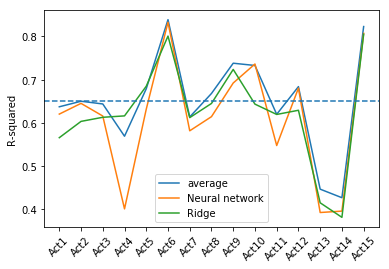

In [107]:
import matplotlib.pyplot as plt
# r2_df.drop("Poisson", axis = 1).plot()
# r2_df.plot()
# ind = list(r2_df.index)
# plt.ylabel("R-squared")
mean_val = r2_df.average.sum()/len(r2_df.average)
df = r2_df.reset_index()
df = df.rename(columns={"index":"hour"})
ax = df[["average", "Neural network", "Ridge"]].plot(xticks=df.index)
plt.axhline(y=mean_val, linestyle='--')
ax.set_xticklabels(df["hour"], rotation=45);
plt.ylabel("R-squared")
plt.show()